# Algorithme de la descente de gradient
Ici, je réécris l'algorithme de la descente de gradient.

## Explication:
L'algorithme de la descente de gradient permet de trouver les paramètres d'un model qui minimisent son erreur lors d'une prediction. 
Il s'agit ici de mettre à jour les paramètres du model jusqu'à trouver les paramètres qui minimisent l'erreur.

## Les étapes:
* Etape 1: On importe les bibliothèques numpy pandas et matplotlib
* Etape 2: On importe les données (le dataset)
* Etape 3: On definit les fonctions suivantes
    * sigmoid: Transforme tout nombre qu'on lui donne en un nombre compris entre 0 et 1 (en une probabilité)
    * cross_entropy: Nous permet d'obtenir l'erreur du model à minimiser
    * gradient: c'est le changement appliqué aux paramètres du model en vu de minimiser son erreur de prediction
    * init_params: permet d'initialiser les parametres du model. Pour un model d'equation Wx + b = 0, W et b sont les paramètres du modele
* Etape 4: On initialise les paramètres du model de facon aléatoire
* Etape 5: On entraine le modele en y faisant passer les donnees 5000 fois (5000 epochs) et en modifiant à chaque fois les parametres du model

## Etape 1: On importe les bibliothèques numpy pandas et matplotlib

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Etape 2: On importe les données (le dataset)

In [17]:
data = pd.read_csv("./data.csv", names=["x1","x2","label"])

In [18]:
data

,x1,x2,label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   label   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## Etape 3: On definit les fonctions

In [20]:
def sigmoid(score):
    return 1/(1+np.exp(-score))

In [21]:
def cross_entropy(y,y_hat):
    return -y*np.log(y_hat)-(1-y)*np.log(1-y_hat)

In [22]:
def gradient(y,y_hat):
    return -(y-y_hat)

In [23]:
def init_params():
    w = np.random.uniform(0,1, size=(2,))    
    b = np.random.uniform(-1,0)
    return w,b

In [24]:
def show_data():
    plt.scatter(data[data["label"] == 0]["x1"],data[data["label"] ==0]["x2"])    
    plt.scatter(data[data["label"] == 1]["x1"],data[data["label"] ==1]["x2"])

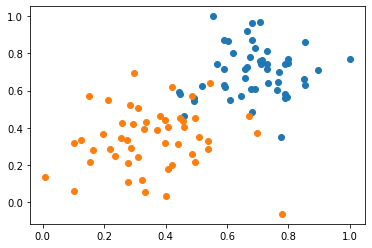

In [25]:
show_data()

## Etape 4: On initialise les paramètres du model de facon aléatoire

-0.7309814488008087

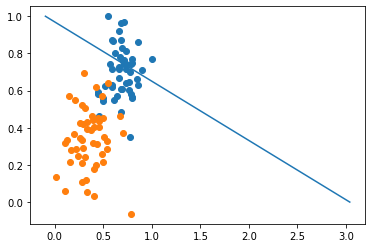

In [26]:
w,b = init_params()
#w[0]x1 + w[1]x2 + b = 0 => x1 = -(w[1]*x2 + b)/w[0]
x2 = np.linspace(0,1,num=10)
x1 = -(w[1]*x2 + b)/w[0]
show_data()
plt.plot(x1,x2)

In [27]:
LEARNING_RATE = .01/len(data)
for e in range(5000):
    for i in range(len(data)-1):
        row = data.iloc[i]
        score = w[0]*row["x1"] + w[1]*row["x2"] + b
        y_hat = sigmoid(score)
        y = row["label"]
        w[0] = w[0] - LEARNING_RATE*gradient(y,y_hat)*row["x1"]
        w[1] = w[1] - LEARNING_RATE*gradient(y,y_hat)*row["x2"]
        b = b - LEARNING_RATE*gradient(y,y_hat)
    if(e%200 == 0):
        print("Loss: "+str(1/len(data)*cross_entropy(y,y_hat))+" === N° Epochs: " +str(e))
print("Fin de l'entrainement du model")

[0.24054429 0.75419067] -0.7309814488008087
Loss: 0.007561158207348436 === N° Epochs: 0
Loss: 0.007035814914667127 === N° Epochs: 200
Loss: 0.0066177991439894494 === N° Epochs: 400
Loss: 0.006257850570341287 === N° Epochs: 600
Loss: 0.005933688508866361 === N° Epochs: 800
Loss: 0.0056349251052924786 === N° Epochs: 1000
Loss: 0.0053564627244816546 === N° Epochs: 1200
Loss: 0.005095565072635834 === N° Epochs: 1400
Loss: 0.0048505535591506785 === N° Epochs: 1600
Loss: 0.004620228686209596 === N° Epochs: 1800
Loss: 0.0044036152106597575 === N° Epochs: 2000
Loss: 0.004199851410768176 === N° Epochs: 2200
Loss: 0.004008142030014765 === N° Epochs: 2400
Loss: 0.003827738992760788 === N° Epochs: 2600
Loss: 0.0036579339388809464 === N° Epochs: 2800
Loss: 0.003498055546313466 === N° Epochs: 3000
Loss: 0.003347468589118355 === N° Epochs: 3200
Loss: 0.003205573446096899 === N° Epochs: 3400
Loss: 0.003071805554815351 === N° Epochs: 3600
Loss: 0.002945634644980036 === N° Epochs: 3800
Loss: 0.002826563

(array([-1.8795768 , -1.69503791]), 1.7189015634903044)

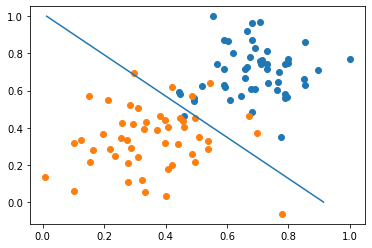

In [28]:
x2 = np.linspace(0,1,num=10)
x1 = -(w[1]*x2 + b)/w[0]
show_data()
plt.plot(x1,x2)